# CondGFN Sequence Analysis: Diversity and Generalization

This notebook analyzes the results of CondGFN comparison tables for different sequence lengths, focusing on diversity and generalization when using conditional GFN versus unconditional GFN.

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 2. Load and Parse Comparison Tables

Load the provided comparison tables for small and medium sequence lengths into pandas DataFrames, handling the table formatting and extracting relevant columns.

In [ ]:
def parse_ascii_table(filepath: str) -> pd.DataFrame:
    with open(filepath, 'r') as f:
        lines = f.readlines()

    header_line = None
    for line in lines:
        if line.strip().startswith('|') and "Seq" in line:
            header_line = line
            break

    if header_line is None:
        raise ValueError("Header line not found in file.")

    headers = [h.strip() for h in header_line.strip().split('|')[1:-1]]

    data = []
    for line in lines:
        line = line.strip()
        if line.startswith('+') or '---' in line:
            continue
        if "Seq" in line:
            continue
        if line.startswith('|'):
            fields = [f.strip() for f in line.split('|')[1:-1]]
            data.append(fields)

    df = pd.DataFrame(data, columns=headers)

    numeric_cols = ['GC %', 'MFE', 'CAI', 'Levenshtein', 'Identity %']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

In [8]:
# Load small and medium tables
small_path = '/home/ubuntu/aya/GFN_for_mRNA_design/sequence_analysis/CondGFN_small_seq_comparison_table.txt'
med_path = '/home/ubuntu/aya/GFN_for_mRNA_design/sequence_analysis/CondGFN_med_seq_comparison_table.txt'

df_small = parse_ascii_table(small_path)
df_med = parse_ascii_table(med_path)

# Filter out summary rows (Best GC, Best MFE, Best CAI, Natural)
def filter_generated(df):
    return df[df['Seq'].str.startswith('Gen')].reset_index(drop=True)

df_small_gen = filter_generated(df_small)
df_med_gen = filter_generated(df_med)

## 3. Visualize Sequence Metrics Across Lengths

Plot metrics such as GC %, MFE, CAI, Levenshtein distance, and Identity % for both small and medium tables to compare distributions and trends.

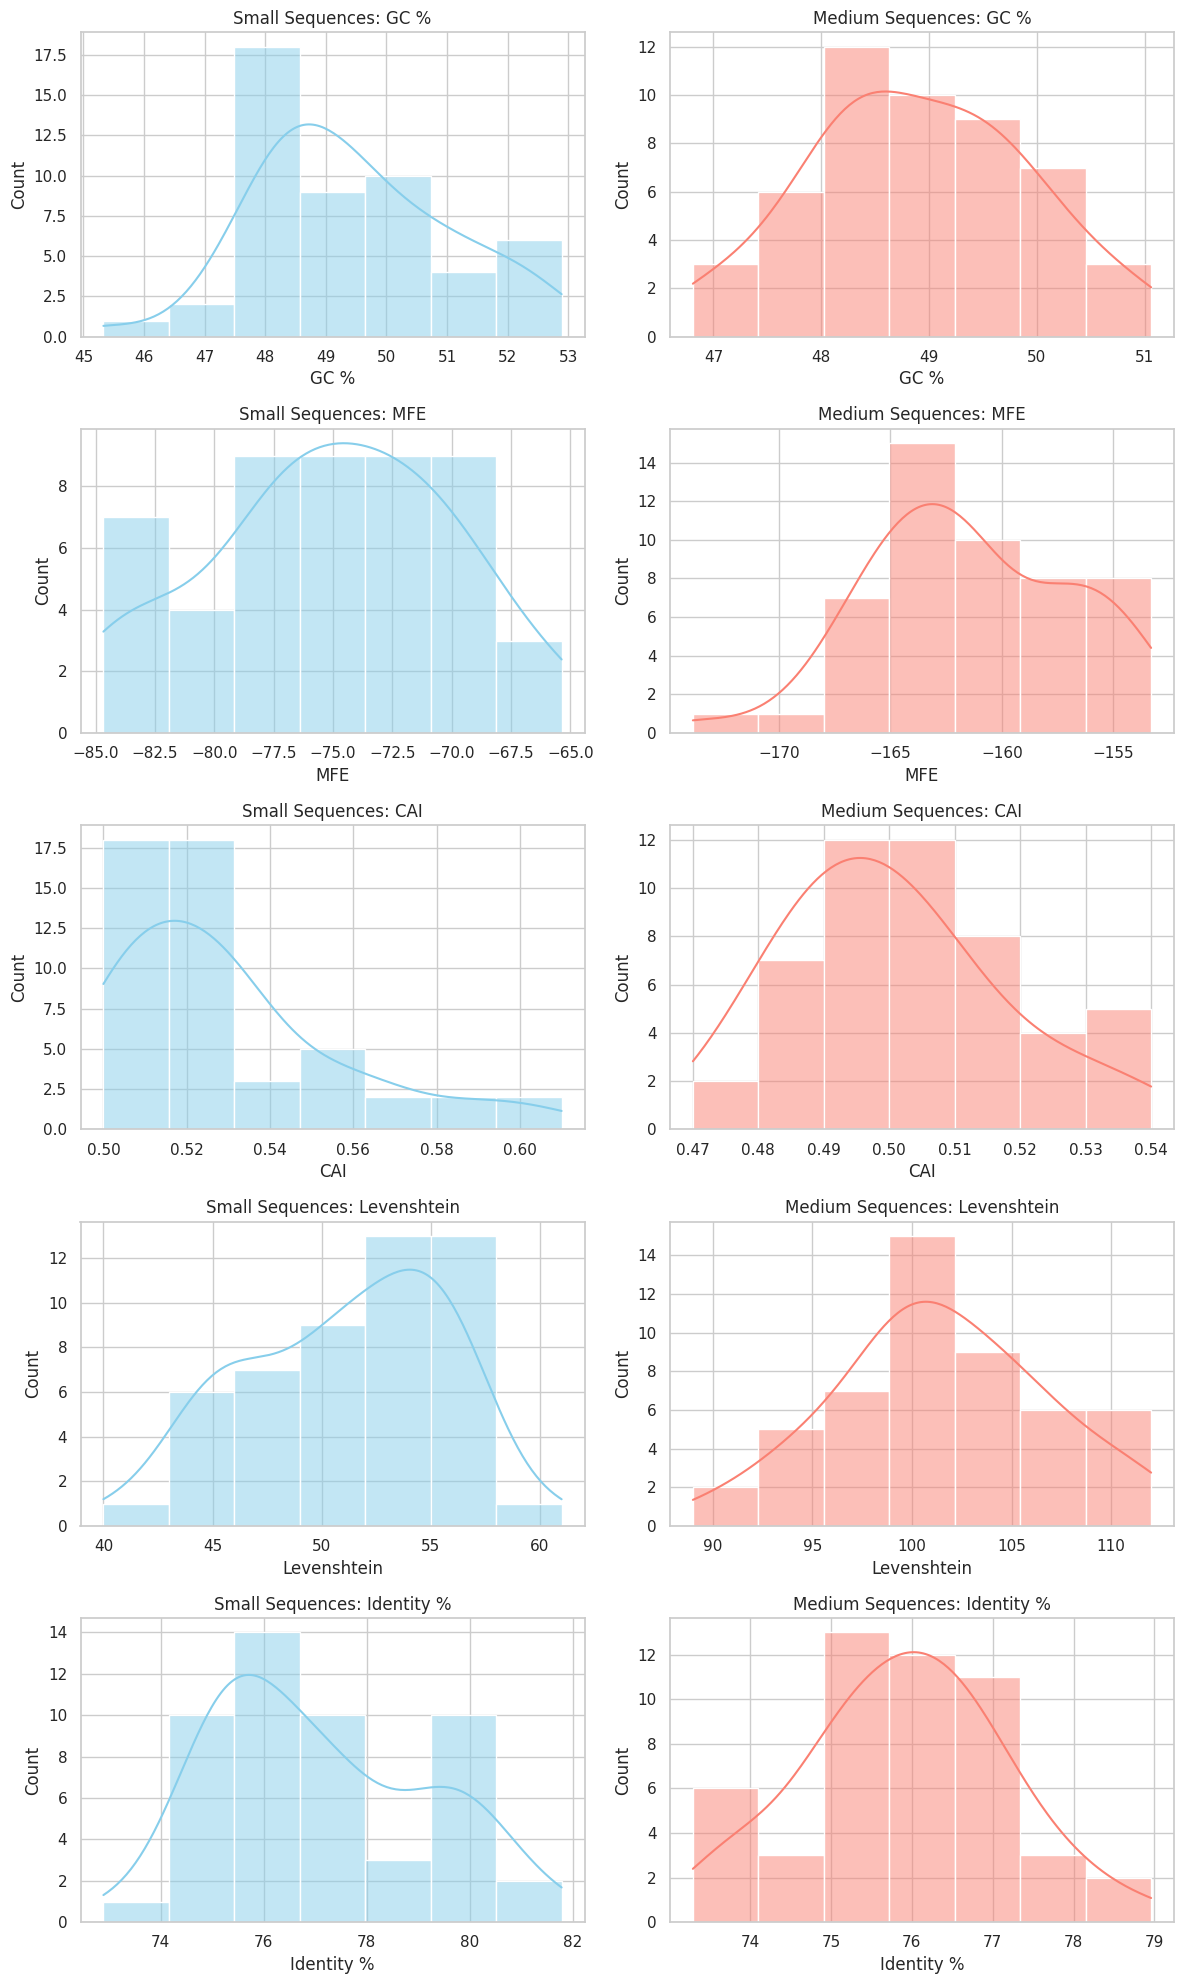

In [11]:
sns.set(style="whitegrid")

metrics = ['GC %', 'MFE', 'CAI', 'Levenshtein', 'Identity %']
fig, axes = plt.subplots(len(metrics), 2, figsize=(12, 20))
for i, metric in enumerate(metrics):
    sns.histplot(df_small_gen[metric], ax=axes[i,0], kde=True, color='skyblue')
    axes[i,0].set_title(f'Small Sequences: {metric}')
    sns.histplot(df_med_gen[metric], ax=axes[i,1], kde=True, color='salmon')
    axes[i,1].set_title(f'Medium Sequences: {metric}')
plt.tight_layout()
plt.show()

## 4. Analyze Diversity (Levenshtein Distance, Identity %)

Compute and visualize diversity metrics (mean, variance of Levenshtein distance and Identity %) for generated sequences, highlighting differences between conditional and unconditional GFN.

Small Diversity Metrics:
  Levenshtein: Mean = 51.10, Std = 4.68
  Identity %: Mean = 77.08, Std = 2.08
Medium Diversity Metrics:
  Levenshtein: Mean = 101.44, Std = 5.36
  Identity %: Mean = 75.91, Std = 1.25


/tmp/ipykernel_772662/1817246683.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Small', 'Medium'])
/tmp/ipykernel_772662/1817246683.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Small', 'Medium'])


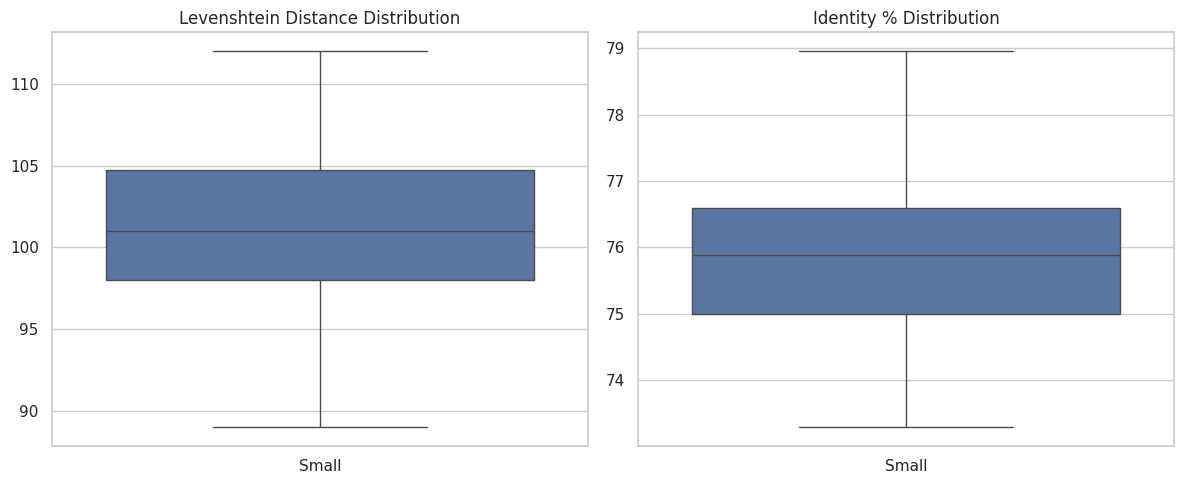

In [12]:
# Diversity metrics summary
def diversity_stats(df, label):
    print(f"{label} Diversity Metrics:")
    for metric in ['Levenshtein', 'Identity %']:
        mean = df[metric].mean()
        std = df[metric].std()
        print(f"  {metric}: Mean = {mean:.2f}, Std = {std:.2f}")

diversity_stats(df_small_gen, "Small")
diversity_stats(df_med_gen, "Medium")

# Boxplots for diversity metrics
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=[df_small_gen['Levenshtein'], df_med_gen['Levenshtein']], ax=axes[0])
axes[0].set_xticklabels(['Small', 'Medium'])
axes[0].set_title('Levenshtein Distance Distribution')
sns.boxplot(data=[df_small_gen['Identity %'], df_med_gen['Identity %']], ax=axes[1])
axes[1].set_xticklabels(['Small', 'Medium'])
axes[1].set_title('Identity % Distribution')
plt.tight_layout()
plt.show()

## 5. Compare Conditional vs Unconditional GFN Results

If unconditional GFN results are available, load and compare them to conditional results using statistical tests and visualizations to assess improvements in diversity and generalization.

*Note: Please add the unconditional GFN comparison tables to enable direct comparison. The following code provides a template for analysis once the data is available.*

In [ ]:
# Example: Load unconditional GFN results if available
# unconditional_small_path = '/home/ubuntu/aya/GFN_for_mRNA_design/sequence_analysis/UncondGFN_small_seq_comparison_table.txt'
# unconditional_med_path = '/home/ubuntu/aya/GFN_for_mRNA_design/sequence_analysis/UncondGFN_med_seq_comparison_table.txt'
# df_uncond_small = parse_ascii_table(unconditional_small_path)
# df_uncond_med = parse_ascii_table(unconditional_med_path)
# df_uncond_small_gen = filter_generated(df_uncond_small)
# df_uncond_med_gen = filter_generated(df_uncond_med)

# # Compare diversity metrics
# for metric in ['Levenshtein', 'Identity %']:
#     plt.figure(figsize=(8,4))
#     sns.boxplot(data=[df_small_gen[metric], df_uncond_small_gen[metric]], palette=['skyblue','gray'])
#     plt.xticks([0,1], ['Conditional', 'Unconditional'])
#     plt.title(f'Small Sequences: {metric} Comparison')
#     plt.show()

## 6. Statistical Analysis of Generalization

Perform statistical analysis (e.g., t-tests, boxplots) to evaluate how well conditional GFN generalizes compared to unconditional, focusing on metrics like CAI and Identity %.

*Note: Statistical comparison requires unconditional GFN results. The following code is a template for such analysis.*

In [ ]:
# Example: Statistical tests for generalization metrics
# for metric in ['CAI', 'Identity %']:
#     cond = df_small_gen[metric]
#     uncond = df_uncond_small_gen[metric]
#     t_stat, p_val = stats.ttest_ind(cond, uncond, nan_policy='omit')
#     print(f"{metric} t-test: t={t_stat:.2f}, p={p_val:.4f}")
#     plt.figure(figsize=(8,4))
#     sns.boxplot(data=[cond, uncond], palette=['skyblue','gray'])
#     plt.xticks([0,1], ['Conditional', 'Unconditional'])
#     plt.title(f'Small Sequences: {metric} Comparison')
#     plt.show()

---

**Summary:**  
This notebook provides a framework for analyzing CondGFN sequence generation results, focusing on diversity and generalization. For a full comparison with unconditional GFN, please add the corresponding result tables.